In [1]:
# CONFIG

basedir = './inputfiles/WWCrA/'
lightcurve_dir = basedir + "outstars/"
#reference_frame = basedir+'WWCrA#30V_000409679_FLAT.fit'
reference_frame = 'wcs.fits' # this is a fits file calculated by astrometry.net
aperture = 2

This does:
```
muniphot *.fit
munimatch --verbose frame001.pht frame*.pht
munifind -a 2 found.txt match*
```

In [2]:
!pwd
!rm {basedir+'*.fts'}
!konve {basedir+'*.fit'} -o {basedir+'kout??????.fts'}
!muniphot {basedir+'*.fts'} -p muniphot.conf -o {basedir+'phot??????.pht'}
!munimatch -s sp_fields=1 {basedir+'phot0000001.pht'} {basedir+'phot??????.pht'} -o {basedir+'match??????.pht'}
!munifind -a {aperture} {basedir+'munifind.txt'} {basedir+'match*'}

/home/jovyan/work
konve (cmunipack) version 2.1.15

./inputfiles/WWCrA/WWCrA#30V_000409679_FLAT.fit => ./inputfiles/WWCrA/kout000001.fts
./inputfiles/WWCrA/WWCrA#30V_000409682_FLAT.fit => ./inputfiles/WWCrA/kout000002.fts
./inputfiles/WWCrA/WWCrA#30V_000409685_FLAT.fit => ./inputfiles/WWCrA/kout000003.fts
./inputfiles/WWCrA/WWCrA#30V_000409688_FLAT.fit => ./inputfiles/WWCrA/kout000004.fts
./inputfiles/WWCrA/WWCrA#30V_000409691_FLAT.fit => ./inputfiles/WWCrA/kout000005.fts
./inputfiles/WWCrA/WWCrA#30V_000409694_FLAT.fit => ./inputfiles/WWCrA/kout000006.fts
./inputfiles/WWCrA/WWCrA#30V_000409697_FLAT.fit => ./inputfiles/WWCrA/kout000007.fts
./inputfiles/WWCrA/WWCrA#30V_000409700_FLAT.fit => ./inputfiles/WWCrA/kout000008.fts
./inputfiles/WWCrA/WWCrA#30V_000409703_FLAT.fit => ./inputfiles/WWCrA/kout000009.fts
./inputfiles/WWCrA/WWCrA#30V_000409706_FLAT.fit => ./inputfiles/WWCrA/kout000010.fts
./inputfiles/WWCrA/WWCrA#30V_000409709_FLAT.fit => ./inputfiles/WWCrA/kout000011.fts
./inputfiles/

In [3]:
# IMPORT

import pandas as pd
import numpy as np
import matplotlib as mp
import matplotlib.pyplot as plt
import seaborn as sns
import os

from astropy import wcs
from astropy.io import fits
from astropy.coordinates import SkyCoord
from astropy.vo.client import conesearch
from astropy import units as u

/opt/conda/lib/python3.5/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
/opt/conda/lib/python3.5/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [4]:
def setup_wcs(coord, naxis1, naxis2):
    w = wcs.WCS(naxis=2)

    # Set up an "Airy's zenithal" projection
    # Vector properties may be set with Python lists, or Numpy arrays
    w.wcs.crpix = [naxis1/2.0, naxis2/2.0]
    w.wcs.cdelt = np.array([-0.000572222222222, 0.000572222222222])
    print("ra/dec", coord.ra.degree, coord.dec.degree)
    w.wcs.crval = [coord.ra.degree, coord.dec.degree]
    w.wcs.ctype = ["RA---AIR", "DEC--AIR"]
    return w

def setup_wcs_from_file(filename):
    hdulist = fits.open(filename)
    return wcs.WCS(hdulist[0].header)
    
def pixel_to_radec(wcs_config, xpix, ypix):
    pixcrd = np.array([[xpix, ypix]], np.float_)
    result = wcs_config.wcs_pix2world(pixcrd, 1)
    return SkyCoord(result[0][0], result[0][1], unit='deg')

def star_to_radec():
    print("todo")
    
    
def get_fits_header(reference_file):
    hdulist = fits.open(reference_file)
    return hdulist[0].header


# fits_header = get_fits_header(reference_frame)
# object_ra = fits_header['OBJCTRA']
# object_dec = fits_header['OBJCTDEC']
# naxis1 = fits_header['NAXIS1']
# naxis2 = fits_header['NAXIS2']
    
    
# coords of center of frame of first image
# c = SkyCoord(object_ra, object_dec, unit="deg")
#wcs_config = setup_wcs(c, naxis1, naxis2)
print("file:",reference_frame, os.getcwd())
wcs_config = setup_wcs_from_file('./'+reference_frame)
result = pixel_to_radec(wcs_config, 1365, 1365)
print(result)

file: wcs.fits /home/jovyan/work
<SkyCoord (ICRS): (ra, dec) in deg
    ( 271.71773067, -43.42034535)>


In [5]:
#conesearch.list_catalogs()
my_catalog = 'Guide Star Catalog v2 1'
#c = SkyCoord.from_name('GSC 7911-3668')
#result = conesearch.conesearch(c, 0.01 * u.degree, catalog_db=my_catalog)
print(result)


<SkyCoord (ICRS): (ra, dec) in deg
    ( 271.71773067, -43.42034535)>


In [6]:
# Set the WCS information manually by setting properties of the WCS
# object.

# Create a new WCS object.  The number of axes must be set
# from the start
w = wcs.WCS(naxis=2)

# Set up an "Airy's zenithal" projection
# Vector properties may be set with Python lists, or Numpy arrays
w.wcs.crpix = [1365/2.0, 1365/2.0]
w.wcs.cdelt = np.array([-0.000572222222222, 0.000572222222222])
w.wcs.crval = [18.0936111, -43.8325000]
w.wcs.ctype = ["RA---AIR", "DEC--AIR"]

# Some pixel coordinates of interest.
pixcrd = np.array([[0, 0], [1365/2.0, 1365/2.0], [45, 98]], np.float_)

# Convert pixel coordinates to world coordinates
world = w.wcs_pix2world(pixcrd, 1)
print(world)

# Convert the same coordinates back to pixel coordinates.
pixcrd2 = w.wcs_world2pix(world, 1)
print(pixcrd2)

# These should be the same as the original pixel coordinates, modulo
# some floating-point error.
assert np.max(np.abs(pixcrd - pixcrd2)) < 1e-6

# Now, write out the WCS object as a FITS header
header = w.to_header()

# header is an astropy.io.fits.Header object.  We can use it to create a new
# PrimaryHDU and write it to a file.
hdu = fits.PrimaryHDU(header=header)
# Save to FITS file
# hdu.writeto('test.fits')

[[ 18.63856748 -44.22175161]
 [ 18.0936111  -43.8325    ]
 [ 18.60215434 -44.16583993]]
[[ -4.76461537e-10  -4.68389771e-10]
 [  6.82500000e+02   6.82500000e+02]
 [  4.50000000e+01   9.80000000e+01]]


Read the Munifind file to get STDEV of all stars

In [7]:

# INDEX MEAN_MAG STDEV GOODPOINTS
def read_munifind(filename):
    df = pd.read_csv(filename, skiprows=[1], sep=' ')
    df.rename(columns = {'INDEX':'STAR'}, inplace = True)
    print("max goodpoints:", df['GOODPOINTS'].max())
    print("min stdev:", df['STDEV'].min())
    print(df.sort_values('STDEV').head())
    return df

df = read_munifind(basedir+'munifind.txt')


max goodpoints: 81
min stdev: 0.00438
     STAR  MEAN_MAG    STDEV  GOODPOINTS
7       7  -0.16225  0.00438          81
41     46   1.05741  0.00440          80
63     69   1.42460  0.00443          81
89     91   1.73368  0.00481          76
153   164   2.32672  0.00482          81


index 2675 is STAR          3243.00000
MEAN_MAG         5.30891
STDEV            0.09380
GOODPOINTS      65.00000
Name: 2675, dtype: float64


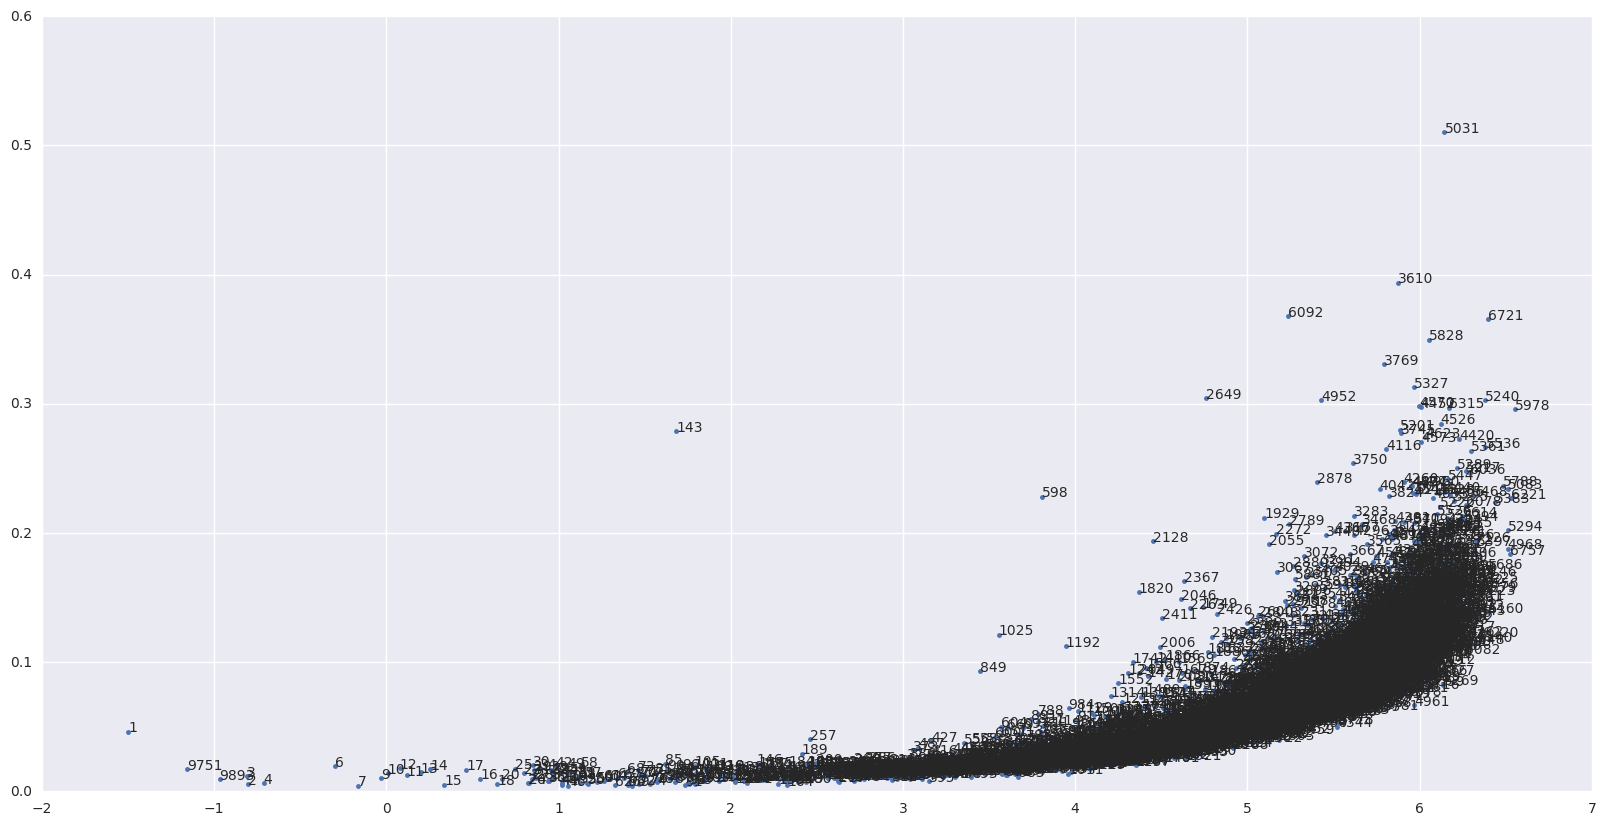

In [8]:
%matplotlib inline
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)
x = df['MEAN_MAG']
y = df['STDEV']
z = df['GOODPOINTS']
realx = x
realy = y
ax.plot(realx, realy, '.')
for i, d in enumerate(x):
    ax.annotate(df['STAR'][i], (realx[i],realy[i]))
print('index 2675 is', df.iloc[2675])


In [9]:
def getBestComparisonStars():
    result = []
    # TODO: filter all stars which have not the maximum of GOODPOINTS
    df_lowest_stdev = df.sort_values('STDEV')
    return df_lowest_stdev.head(10)
    
bestcomps = getBestComparisonStars()
print(bestcomps)
check_stars = []
for index, row in bestcomps.iterrows():
    #print(row, '\n')
    check_stars.append(int(row['STAR']))
check_stars_str = ','.join(map(str, check_stars)) 
print(check_stars_str)

     STAR  MEAN_MAG    STDEV  GOODPOINTS
7       7  -0.16225  0.00438          81
41     46   1.05741  0.00440          80
63     69   1.42460  0.00443          81
89     91   1.73368  0.00481          76
153   164   2.32672  0.00482          81
61     66   1.40336  0.00489          79
57     62   1.32589  0.00496          81
37     41   1.01791  0.00511          80
14     15   0.33558  0.00519          81
4       2  -0.80153  0.00565          81
7,46,69,91,164,66,62,41,15,2


In [10]:
print(df.iloc[143])

STAR          159.00000
MEAN_MAG        2.23743
STDEV           0.01121
GOODPOINTS     66.00000
Name: 143, dtype: float64


In [11]:
select_star_list = [143,6394,598,2675,3111,2584]
single_star_list = [598]
all_star_list = range(1,1000)
star_list = all_star_list


In [12]:
import subprocess
# munilist -a 2 --object 143 -v 143 -c 40 143.txt match*.pht

def write_lightcurve(checkstar, star_list, aperture, lightcurve_dir):
    for star in star_list:
        print("lightcurve:", star)
#        print("--verbose -a ", str(aperture), " -q --object ", str(star), " -v ", str(star), 
#              " -c ", str(check_stars_str), (lightcurve_dir + str(star) + ".txt"), (basedir+'match*.pht'))
        !munilist --verbose -a {str(aperture)} -q --object {str(star)} -v {str(star)} -c {str(check_stars_str)} {lightcurve_dir + str(star) + ".txt"} {basedir+'match*.pht'}
#        !munilist --verbose -a {str(aperture)} -q --object {str(star)} -v {str(star)} -c {str(8)} {lightcurve_dir + str(star) + ".txt"} {basedir+'match*.pht'}

def write_pos(star_list, aperture, lightcurve_dir):
    for star in star_list:
        print("pos:", star)
        !munilist -a {str(aperture)} -q --obj-plot --object {str(star)} {lightcurve_dir + "pos_" + str(star) + ".txt"} {basedir+'match*.pht'}
                
#star_list = (143,264,2675,1045,847,1193)
!mkdir {lightcurve_dir}
write_pos(star_list, aperture, lightcurve_dir)
write_lightcurve(6, star_list, aperture, lightcurve_dir)

mkdir: cannot create directory ‘./inputfiles/WWCrA/outstars/’: File exists
pos: 143

./inputfiles/WWCrA/match000001.pht
./inputfiles/WWCrA/match000002.pht
./inputfiles/WWCrA/match000003.pht
./inputfiles/WWCrA/match000004.pht
./inputfiles/WWCrA/match000005.pht
./inputfiles/WWCrA/match000006.pht
./inputfiles/WWCrA/match000007.pht
./inputfiles/WWCrA/match000008.pht
./inputfiles/WWCrA/match000009.pht
./inputfiles/WWCrA/match000010.pht
./inputfiles/WWCrA/match000011.pht
./inputfiles/WWCrA/match000012.pht
./inputfiles/WWCrA/match000013.pht
./inputfiles/WWCrA/match000014.pht
./inputfiles/WWCrA/match000015.pht
./inputfiles/WWCrA/match000016.pht
./inputfiles/WWCrA/match000017.pht
./inputfiles/WWCrA/match000018.pht
./inputfiles/WWCrA/match000019.pht
./inputfiles/WWCrA/match000020.pht
./inputfiles/WWCrA/match000021.pht
./inputfiles/WWCrA/match000022.pht
./inputfiles/WWCrA/match000023.pht
./inputfiles/WWCrA/match000024.pht
./inputfiles/WWCrA/match000025.pht
./inputfiles/WWCrA/match000026.pht
./inp

Reading lightcurve 143


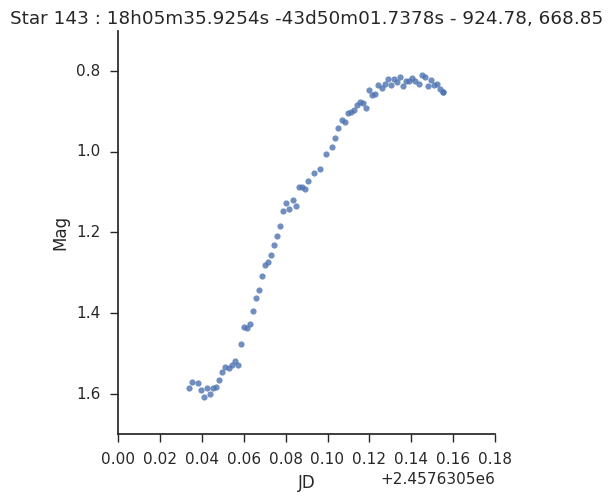

Reading lightcurve 6394


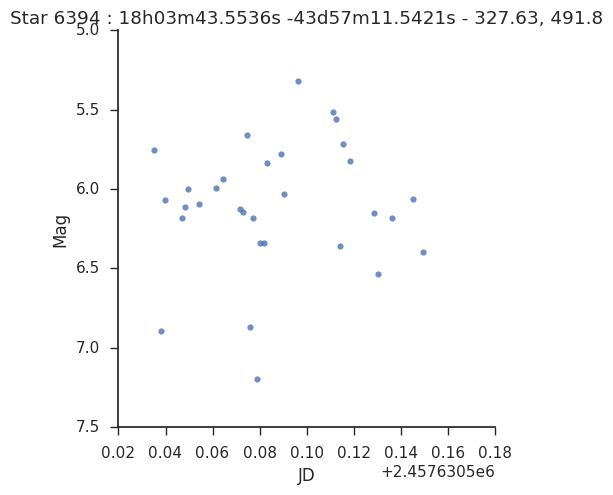

Reading lightcurve 598


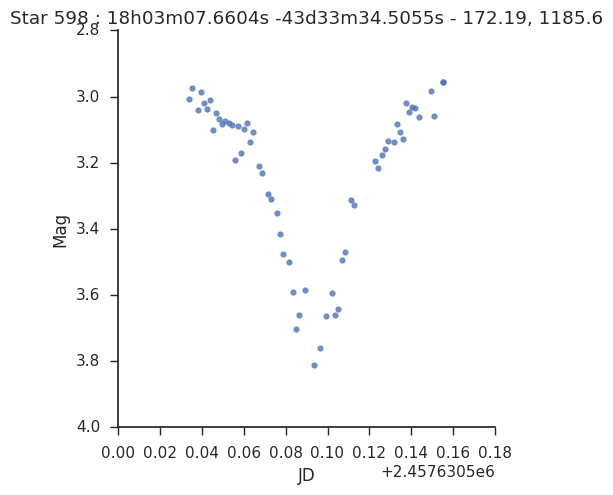

Reading lightcurve 2675


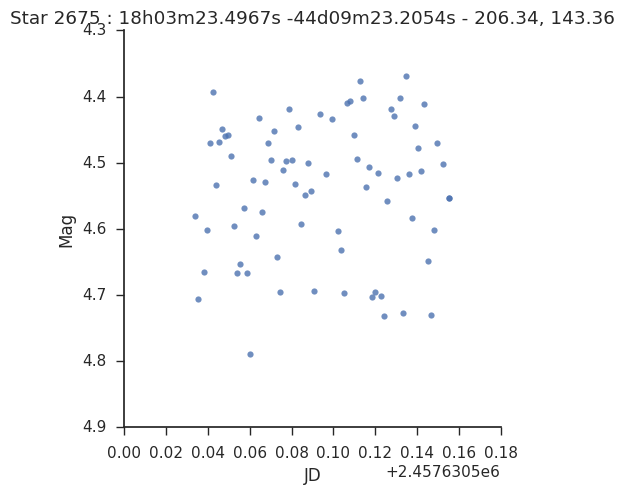

Reading lightcurve 3111


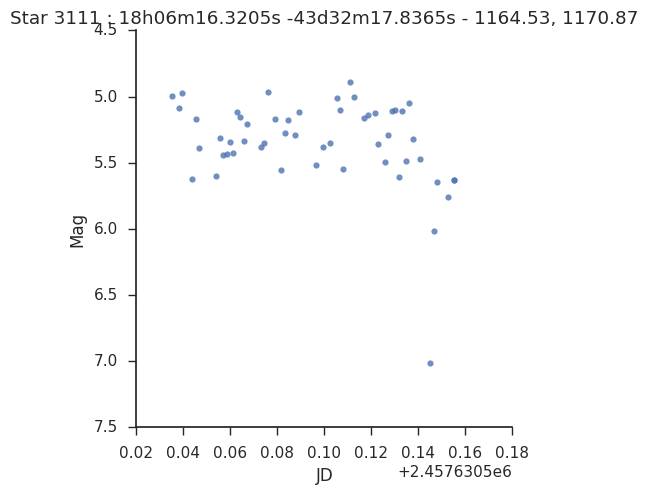

Reading lightcurve 2584


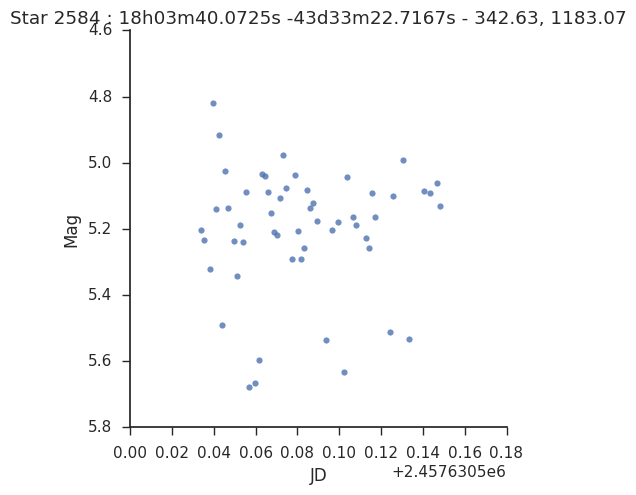

In [13]:
def set_seaborn_style():
    sns.set_context("notebook", font_scale=1.1)
    sns.set_style("ticks")

def read_lightcurve(star):
    print("Reading lightcurve", star)
    df = pd.read_csv(lightcurve_dir + str(star) + '.txt', skiprows=[1], sep=' ')
    df = df[df['V-C'] < 99]
    return df

def read_pos(star):
    df = pd.read_csv(lightcurve_dir + 'pos_' + str(star) + '.txt', skiprows=[1], sep=' ')
    df = df[df['X'] > 0]
    df = df[df['MAG'] < 99]
    return (df['X'].iloc[1], df['Y'].iloc[1])

def plot_lightcurve(df2, pos, name):
    g = sns.lmplot('JD', 'V-C', 
               data=df2, 
               fit_reg=False)
    plt.title('Star '+ str(name) + " : " + pixel_to_radec(wcs_config, pos[0], pos[1]).to_string('hmsdms') + ' - ' +str(pos[0]) + ', ' + str(pos[1]))
    plt.xlabel('JD')
    plt.ylabel('Mag')    
    plt.gca().invert_yaxis()
    plt.ticklabel_format(style='plain', axis='x')
    plt.figure(figsize=(70,10)) 
    sns.plt.show()
    g.savefig(lightcurve_dir+str(star))
    
set_seaborn_style()
for star in star_list:
    plot_lightcurve(read_lightcurve(star), read_pos(star), star)


In [16]:
import upsilon
upsilon.test_predict()

2017-01-22 20:37:02,615 INFO - Read a light curve
2017-01-22 20:37:02,623 INFO -    Before sigma-clipping: 551 data points
2017-01-22 20:37:02,624 INFO -    After sigma-clipping: 551 data points
2017-01-22 20:37:03,308 INFO - Feature extracting time: 0.6843 seconds
2017-01-22 20:37:03,309 INFO - Extracted features. 16 of these, marked with (+) are used to predict a class:
2017-01-22 20:37:03,309 INFO -    (+) amplitude: 0.097430
2017-01-22 20:37:03,310 INFO -    (-) cusum: 0.070156
2017-01-22 20:37:03,310 INFO -    (-) eta: 2.428789
2017-01-22 20:37:03,311 INFO -    (+) hl_amp_ratio: 0.703306
2017-01-22 20:37:03,311 INFO -    (+) kurtosis: -1.197611
2017-01-22 20:37:03,311 INFO -    (-) n_points: 551
2017-01-22 20:37:03,312 INFO -    (+) period: 4.190441
2017-01-22 20:37:03,312 INFO -    (-) period_SNR: 148.150908
2017-01-22 20:37:03,312 INFO -    (-) period_log10FAP: -99.703012
2017-01-22 20:37:03,313 INFO -    (-) period_uncertainty: 0.007102
2017-01-22 20:37:03,313 INFO -    (+) pha

In [15]:
rf_model = upsilon.load_rf_model()
for star in all_star_list:
    try:
        df = read_lightcurve(star)
        mag = df['V-C']
        date = df.index.values
        e_features = upsilon.ExtractFeatures(date, mag)
        e_features.run()
        features = e_features.get_features()

        # Classify the light curve
        label, probability, flag = upsilon.predict(rf_model, features)
        print("star, label, probability, flag")
        print(star, label, probability, flag)
    except:
        print(star, 'error')
    

Reading lightcurve 1
1 error
Reading lightcurve 2
2 error
Reading lightcurve 3
3 error
Reading lightcurve 4
4 error
Reading lightcurve 5
5 error
Reading lightcurve 6
6 error
Reading lightcurve 7
7 error
Reading lightcurve 8
8 error
Reading lightcurve 9
9 error
Reading lightcurve 10
10 error
Reading lightcurve 11
11 error
Reading lightcurve 12
12 error
Reading lightcurve 13
13 error
Reading lightcurve 14
14 error
Reading lightcurve 15
15 error
Reading lightcurve 16
16 error
Reading lightcurve 17
17 error
Reading lightcurve 18
18 error
Reading lightcurve 19
19 error
Reading lightcurve 20
20 error
Reading lightcurve 21
21 error
Reading lightcurve 22
22 error
Reading lightcurve 23
23 error
Reading lightcurve 24
24 error
Reading lightcurve 25
25 error
Reading lightcurve 26
26 error
Reading lightcurve 27
27 error
Reading lightcurve 28
28 error
Reading lightcurve 29
29 error
Reading lightcurve 30
30 error
Reading lightcurve 31
31 error
Reading lightcurve 32
32 error
Reading lightcurve 33
33 e

/opt/conda/lib/python3.5/site-packages/upsilon-1.2.4-py3.5.egg/upsilon/extract_features/extract_features.py:61: UserWarning: The number of data points are less than 80.
  % min_n_data)
